<a href="https://colab.research.google.com/github/nurainizafiraaa/Case-Study-Regression-/blob/main/Zafira_Nuraini_Assignment_Day_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Day 33 - Regularized Regression

# **1. Import Libraries & Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [ ]:
# load data
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **2. Preliminary Flow**

In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# cek ada missing value atau tidak

boston.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

Definisi setiap variabel (source by searching)

**Variabel Boston Housing Dataset**

* CRIM → Tingkat kejahatan per kapita di suatu kota/town.
* ZN → Persentase lahan residensial untuk rumah dengan ukuran lebih dari 25.000 sq.ft.
* INDUS → Persentase area kota yang digunakan untuk bisnis non-retail (industri).
* CHAS → Dummy variable: 1 jika area berbatasan dengan sungai Charles, 0 jika tidak.
* NOX → Konsentrasi polusi udara (nitric oxides) dalam ppm.
* RM → Rata-rata jumlah kamar per rumah.
* AGE → Persentase rumah yang dibangun sebelum tahun 1940.
* DIS → Jarak rata-rata ke lima pusat pekerjaan utama di Boston.
* RAD → Indeks aksesibilitas ke jalan tol radial (semakin tinggi → lebih mudah akses ke jalan tol).
* TAX → Tingkat pajak properti penuh per $10.000.
* PTRATIO → Rasio murid terhadap guru di kota.
* B → 1000(Bk – 0.63)², di mana Bk = proporsi penduduk berkulit hitam di kota.
* LSTAT → Persentase populasi dengan status sosial ekonomi rendah.
* MEDV → Median harga rumah yang dimiliki (dalam ribuan USD)

Dengan melihat maksud setiap kolom dalam dataset di atas, maka kita bisa mengetahui bagaimana setiap variabel berpengaruh ke harga rumah di Boston.<br>
Terlihat bahwa terdapat 13 variabel yang berpengaruh ke tinggi rendahnya suatu harga rumah. Cntohnya CRIM (tingkat kejahatan), semakin tinggi nilainya maka akan membuat harga rumah semakin jatuh/rendah.

**Oleh karena itu, pada modeling yang akan dijalankan sekarang, kita akna menggunakan MEDV sebagai target dan 13 kolom lainny sebagai parameter/features yang menentukan target.**

## Split data: train-validation-test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

# First splitting: pretrain and test
feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

## Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(feature_boston_train)
#feature_boston_train_scaled = scaler.transform(feature_boston_train)

In [ ]:
#feature_boston_train = pd.DataFrame(feature_boston_train_scaled, columns=feature_boston_train.columns,index=feature_boston_train.index)
#feature_boston_train.head()

Saya tidak menggunakan scaling karena hasilnya model jika mengikuti lambda terkecil menjadi tidak bisa diterapkan :)

Will explore more in next assignment:)

# **3. Multicoloniarity Check**


## Calculate VIF

Kita akan melakukan perhitungan VIF score untuk mengidentifikasi multicoloniarity dari setiap variabel, karena model akan semakin bagus jika memiliki multicoloniarity yang rendah antar variabel.

In [ ]:
# calculate VIF scores pada features

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

x = add_constant(feature_boston_train)

vif_boston = pd.DataFrame([vif(x.values, i)
               for i in range(x.shape[1])],
              index=x.columns).reset_index()

vif_boston.columns = ['feature','VIF_score']
vif_boston = vif_boston.loc[vif_boston.feature!='const']

vif_boston

,feature,VIF_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


Setelah dilakukan pengecekan score VIF, ternyata terdapat beberapa variabel yang memiliki **high - moderate VIF scores (>4)**:
1. nox
2. dis
3. rad
4. tax

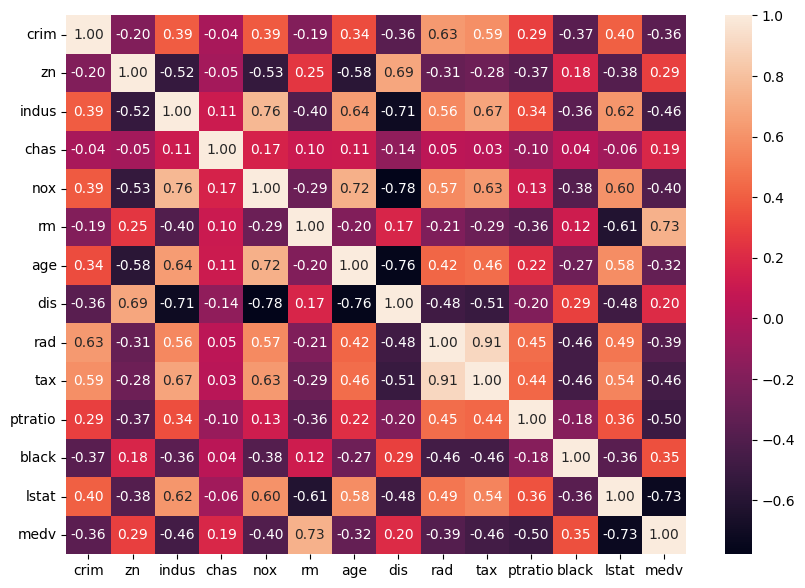

In [ ]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**We choose to retain indus**. Therefore, we need to drop:
1. rad
2. dis
3. nox
4. tax



## Drop Multicollinear Features

In [ ]:
feature_boston_train = feature_boston_train.drop(columns=['nox', 'dis', 'rad', 'tax'])
feature_boston_validation = feature_boston_validation.drop(columns=['nox', 'dis', 'rad', 'tax'])
feature_boston_test = feature_boston_test.drop(columns=['nox', 'dis', 'rad', 'tax'])

## Recheck VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

x = add_constant(feature_boston_train)

vif_boston = pd.DataFrame([vif(x.values, i)
               for i in range(x.shape[1])],
              index=x.columns).reset_index()

vif_boston.columns = ['feature','VIF_score']
vif_boston = vif_boston.loc[vif_boston.feature!='const']

vif_boston

,feature,VIF_score
1,crim,1.361139
2,zn,1.760619
3,indus,2.334671
4,chas,1.078089
5,rm,1.876939
6,age,2.490305
7,ptratio,1.352767
8,black,1.290723
9,lstat,2.904905


Hasilnya menunjukkan semua variabel features memiliki nilai VIF < 3 yang artinya tidak ada multicolloniarity sampai bersifat rendah --> Bagus

# **4. Workflow with choosing the best lambda for Create Best Model**


## Train Multiple Models
with different alpha (lambda) --> untuk menemukan model terbaik

### Ridge

**Setelah trial error dengan alpha yang akan diuji pada ridge, akhirnya menggunakan 4 pilihan alpha yaitu --> 1, 10, 70, dan 100**

In [ ]:
from sklearn.linear_model import Ridge

# train the model
x_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)
ridge_reg_seventy = Ridge(alpha=70, random_state=42)
ridge_reg_onehunderds = Ridge(alpha=100, random_state=42)

# fit the model (training)
ridge_reg_pointone.fit(x_boston_train, y_boston_train)
ridge_reg_ten.fit(x_boston_train, y_boston_train)
ridge_reg_seventy.fit(x_boston_train, y_boston_train)
ridge_reg_onehunderds.fit(x_boston_train, y_boston_train)

Ridge(alpha=100, random_state=42)

**Find the best model (alpha) based on validation set**

In [ ]:
from sklearn.metrics import mean_squared_error

x_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alpha_ridge = [0.1, 10, 70, 100]
models = [ridge_reg_pointone,
          ridge_reg_ten,
          ridge_reg_seventy,
          ridge_reg_onehunderds]

for model, alpha in zip(models, alpha_ridge):
    y_predict_validation = model.predict(x_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.1 is 5.098862595720049
RMSE of Ridge regression model with alpha = 10 is 5.051145683209072
RMSE of Ridge regression model with alpha = 70 is 4.985935438488367
RMSE of Ridge regression model with alpha = 100 is 4.991369140388119


#### Coefficients

**Akhirnya setelah diuji, didapat bahwa alpha=70 memiliki nilai RMSE terkecil.**

In [ ]:
ridge_best = ridge_reg_onehunderds

coef_boston = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_boston

,feature,coefficient
0,intercept,24.164739
1,crim,-0.049074
2,zn,-0.000053
3,indus,0.001299
4,chas,0.581678
5,rm,2.740932
6,age,0.042973
7,ptratio,-0.906118
8,black,0.011208
9,lstat,-0.713879


### Lasso

**Setelah trial error dengan alpha yang akan diuji di Lasso, akhirnya menggunakan 4 pilihan alpha yaitu --> 0.1, 0.5, 1, dan 10**

In [ ]:
from sklearn.linear_model import Lasso

# train the model
x_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_pointfive = Lasso(alpha=0.5, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointone.fit(x_boston_train, y_boston_train)
lasso_reg_pointfive.fit(x_boston_train, y_boston_train)
lasso_reg_one.fit(x_boston_train, y_boston_train)
lasso_reg_ten.fit(x_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

**Find the best model (alpha) based on validation set**

In [ ]:
from sklearn.metrics import mean_squared_error

x_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.1, 0.5, 1, 10]
models = [lasso_reg_pointone,
          lasso_reg_pointfive,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(x_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.1 is 5.0794695653695845
RMSE of Ridge regression model with alpha = 0.5 is 5.021471748084939
RMSE of Ridge regression model with alpha = 1 is 4.986890157032997
RMSE of Ridge regression model with alpha = 10 is 5.4366365235863565


#### Coefficients

**Akhirnya setelah diuji, didapat bahwa alpha=1 memiliki nilai RMSE terkecil.**

In [ ]:
lasso_best = lasso_reg_ten

coef_lasso_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_lasso_df

,feature,coefficient
0,intercept,26.087253
1,crim,-0.000000
2,zn,0.008032
3,indus,-0.000000
4,chas,0.000000
5,rm,0.000000
6,age,0.000382
7,ptratio,-0.000000
8,black,0.014860
9,lstat,-0.694793


# **5. Interpretasi Model**

**Ridge**

Seteleh didapati lambda terbaik untuk regresi Ridge yakni alpha = 70,

Berikut adalah **persamaan untuk mendapatkan harga rumah** (medv), <br>
medv = 20.71 - 0.049crim -0.0019 zn + 0.0093 indus + 0.755 chas + 3.22 rm + 0.038 age - 0.903 ptratio + 0.0115 black - 0.679 lstat.

Sehingga, variabel yang mempengaruhi ***naiknya harga*** rumah (terkuat ke terlemah) --> *rm, chas, age, black, indus*. Sedangkan yang mempengaruhi **harga turun** (terkuat ke terlemah) --> *ptratio, lstat, crim, zn*

**Lasso**

Seteleh didapati lambda terbaik untuk regresi Ridge yakni alpha = 70,

Berikut adalah **persamaan untuk mendapatkan harga rumah** (medv), <br>
medv = 22.92 -0.041 crim -0.0013 zn + 2.56 rm + 0.04 age - 0.775 ptratio + 0.011 black - 0.718 lstat.

Terlihat bahwa indus dan chaos secara otomatis menjadi 0 dengan regresi Lasso, karena Lasso hanya akan mempertahankan fitur yang relevan.

Sehingga, variabel yang mempengaruhi ***naiknya harga*** rumah (terkuat ke terlemah) --> *rm, age, black, zn*. Sedangkan yang mempengaruhi ***harga turun*** (terkuat ke terlemah) --> *ptratio, lstat, crim*

**SIMPULAN**

Dengan hasil model dari RIdge maupun Lasso, keduanya menghasilkan variabel kontributor yang sama terhadap penyebab naik turunnya harga rumah. <br>
Dengan rm, age, dan black konsisten menyebabkan harga naik dan ptratio dan lstat menyebabkan harga turun.

Sedangkan di sisi lain zn punya pengaruh namun sangat kecil baik untuk menaikkan (ridge) ataupun menurunkan (lasso.

# **6. Diagnostic Study**


## R2

**Ridge**

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(x_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.6991993233697018


**Lasso**

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(x_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_boston_train, y_predict_train)))

R-squared for training data is 0.5160218388540954


**Hasil**

* **Dari R2 nilai training data adalah 0.707 atau 70.7%, sedangkan dengan Lasso, hasilnya 0.69 atau 69.1%**<br>
Artinya, semakin mendekati 1/ 100% model semakin baik, atau model dapat menangkap dan menjelaskan 70.7% (dengan ridge) atau 69.1% (dengan Lasso) variansi dari harga rumah.



## Residuals

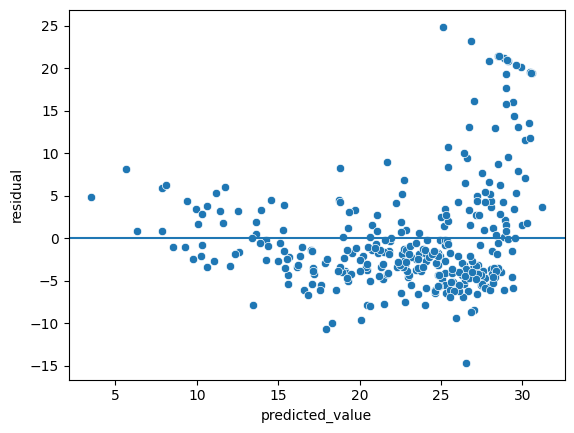

In [ ]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Asumsisetelah melihat hasil plot residuals:

1. Linear relationship: OK. <br>
Garis horizontal y=0 cukup merepresentasikan keseluruhan titik residual.
2. Stable Variance : NO. <br>
Variasinya mengumpul ke 0 dan menyebar ke atas dan kebawah dengan selisih ke 0 yang bervariansi tak beraturan.
3. Independent residual: OK. <br>
Tidak ada pattern yang mencolok pada residuals yang berdekatan.

# **Model Evaluation**

## Ridge

### Training Data

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(x_boston_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 5.226974011244885
MAE for training data is 3.765575349694136
MAPE for training data is 0.17891878098890188


### Testing Error

In [ ]:
# prepare prediction result on test data
x_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(x_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.306979566448054
MAE for testing data is 3.460471787321878
MAPE for testing data is 0.18124604189041527


## Lasso

### Training Data

In [ ]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(x_boston_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_boston_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_boston_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_boston_train, y_predict_train)))

RMSE for training data is 6.630157098348917
MAE for training data is 4.802674648383906
MAPE for training data is 0.21851876353996733


### Testing Data

In [ ]:
# prepare prediction result on test data
x_boston_test = feature_boston_test.to_numpy()
y_predict_test = lasso_best.predict(x_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_boston_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_boston_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_boston_test, y_predict_test)))

RMSE for testing data is 5.951824422053059
MAE for testing data is 4.310382584214629
MAPE for testing data is 0.2214960312557373


## **SIMPULAN**

Hasil perbandingan evaluasi model terhadap Ridge maupun Lasso terhadap training dan test model:

**Training Data**
1. Ridge
* RMSE 5.150035549598731
* MAE 3.6987895161263844
* MAPE  0.17702095641011067

2. Lasso
* RMSE 5.296197167213058
* MAE 3.815080072862143
* MAPE 0.18026795048731614

**Terlihat keduanya menampakkan haisl yang tidak jauh berbeda, keduanya memiliki MAPE mendekati 0. Sehingga artinya rata-rata prediksi terhadap harga rumah yang dihasilkan dapat meleset sekitar 0.17 (ridge) atau 0.18 (lasso).**

=========================

**Test Data**
1. Ridge
* RMSE 5.3185384791312424
* MAE 3.4259840754204607
* MAPE 0.18065714128828606

2. Lasso
* RMSE 5.328830060084201
* MAE 3.557491896284428
* MAPE 0.18609923417026214

**Terlihat keduanya menampakkan haisl yang tidak jauh berbeda, keduanya memiliki MAPE mendekati 0. Sehingga artinya rata-rata prediksi terhadap harga rumah yang dihasilkan dapat meleset sekitar 0.18 (ridge) atau 0.186 (lasso).**

Di sisi lain, karena nilai RMSE > MAE, ini mengindikasikan bahwa ada beberapa data error berupa outliers yang menyebabkan nilai RMSE tinggi.

Baik dari model Ridge maupun Lasso, keduanya memiliki selisih yang sangat kecil dari nilai RMSE, MAE, dan MAPE nya antara training dan test data. **Sehingga dapat disimpulkan bahwa tidak ada indikasi underfitting maupun overfitting.**

**Pada akhisrnya kedua model memiliki performa yang sama-sama baiknya dan tidak berbeda sigifikan.**